In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = 'final_dataset.csv'  
data = pd.read_csv(file_path)

In [3]:
data = data.select_dtypes(include=[float, int])  
data = data.fillna(data.median())  

In [4]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
model.fit(scaled_data)

IsolationForest(contamination=0.01)

In [6]:
# Predict anomalies
anomalies = model.predict(scaled_data)
data['Anomaly'] = anomalies

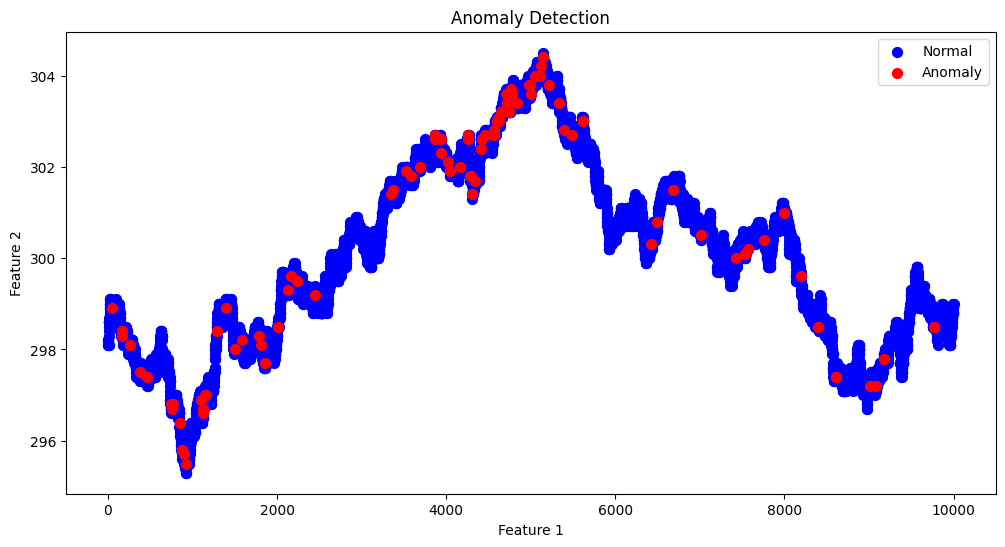

In [7]:
# Plotting
plt.figure(figsize=(12, 6))

# Plotting normal points
normal_data = data[data['Anomaly'] == 1]
plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1], c='blue', label='Normal', s=50)

# Plotting anomalies
anomalies_data = data[data['Anomaly'] == -1]
plt.scatter(anomalies_data.iloc[:, 0], anomalies_data.iloc[:, 1], c='red', label='Anomaly', s=50)

plt.title('Anomaly Detection')
plt.xlabel('Feature 1')  # Replace with actual feature names
plt.ylabel('Feature 2')  # Replace with actual feature names
plt.legend()
plt.show()

In [8]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,operational_hours,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean,Anomaly
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,2599.831500,2359.175195,0.002787,0.001674,0.498900,0.000044,-0.000051,-0.004675,0.002883,0.001537,0.000814,0.980000
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1434.530378,1434.573018,0.997068,0.995062,0.500024,1.005807,1.005003,0.444724,0.441622,0.448764,0.452862,0.199007
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,111.000000,-43.059499,-1.732027,-1.736148,0.000000,-2.431814,-2.370071,-1.470536,-1.440718,-1.312040,-1.457290,-1.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,1335.000000,1040.807703,-0.864390,-0.866009,0.000000,-0.722539,-0.734620,-0.319464,-0.307236,-0.313460,-0.306783,1.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,2545.000000,2437.613362,0.013734,0.006039,0.000000,-0.001287,-0.004294,-0.005249,-0.004721,-0.000481,-0.000567,1.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,3909.000000,3612.921791,0.862230,0.860559,1.000000,0.728154,0.730219,0.304314,0.314809,0.312976,0.315003,1.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,4995.000000,4869.004338,1.731966,1.716001,1.000000,2.409244,2.424051,1.420633,1.449112,1.430085,1.606263,1.000000


In [9]:
from sklearn.svm import OneClassSVM

In [10]:
# Initialize and fit the model
model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
model.fit(data)

# Predict anomalies
y_pred = model.predict(data)

In [11]:
import numpy as np
anomaly_values=data.iloc[np.where(y_pred==-1)]
print(anomaly_values)

       UDI  Air temperature [K]  Process temperature [K]  \
0        1                298.1                    308.6   
5        6                298.1                    308.6   
6        7                298.1                    308.6   
8        9                298.3                    308.7   
9       10                298.5                    309.0   
...    ...                  ...                      ...   
9990  9991                298.8                    308.5   
9992  9993                298.8                    308.4   
9993  9994                298.8                    308.4   
9995  9996                298.8                    308.4   
9997  9998                299.0                    308.6   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
5                       1425         41.9               11       0   
6                       1558         42.4               14       0   

In [12]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [13]:
# Load your dataset
file_path = 'final_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [14]:
# Preprocess the data
# Example: Drop non-numeric columns and fill missing values if necessary
data = data.select_dtypes(include=[float, int])  # Keep only numeric columns
data = data.fillna(data.median())  # Fill missing values

In [15]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [16]:
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
model.fit(scaled_data)

IsolationForest(contamination=0.01)

In [17]:
# Predict anomalies
anomalies = model.predict(scaled_data)
data['Anomaly'] = anomalies

In [18]:
# -1 for anomalies, 1 for normal points
print(data)

# Save the results to a new CSV file
output_file = 'C:/Users/manis/OneDrive/Desktop/HACKERA/results.csv'
data.to_csv(output_file, index=False)

        UDI  Air temperature [K]  Process temperature [K]  \
0         1                298.1                    308.6   
1         2                298.2                    308.7   
2         3                298.1                    308.5   
3         4                298.2                    308.6   
4         5                298.2                    308.7   
...     ...                  ...                      ...   
9995   9996                298.8                    308.4   
9996   9997                298.9                    308.4   
9997   9998                299.0                    308.6   
9998   9999                299.0                    308.7   
9999  10000                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                